# Explore here

In [1]:
# Your code here
import requests

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

# Hacer una solicitud GET para obtener el archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en la carpeta data/raw
    with open('/workspaces/Finarosalina_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv', 'wb') as file:
        file.write(response.content)
    print("Archivo descargado correctamente!")
else:
    print(f"Hubo un problema al descargar el archivo: {response.status_code}")


Archivo descargado correctamente!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



df=pd.read_csv('/workspaces/Finarosalina_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv',  sep=';')
df.head()
# shape  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()
print(df[duplicados])

# Veo que hay 12 filas duplicadas, por lo que las elimino
print(f"Total de filas duplicadas: {duplicados.sum()}")

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [4]:
df=df.drop_duplicates()
duplicados = df.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Variables categoricas: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 

'y' : TARGET; El cliente contrata un depósito a largo plazo o no (categórico)

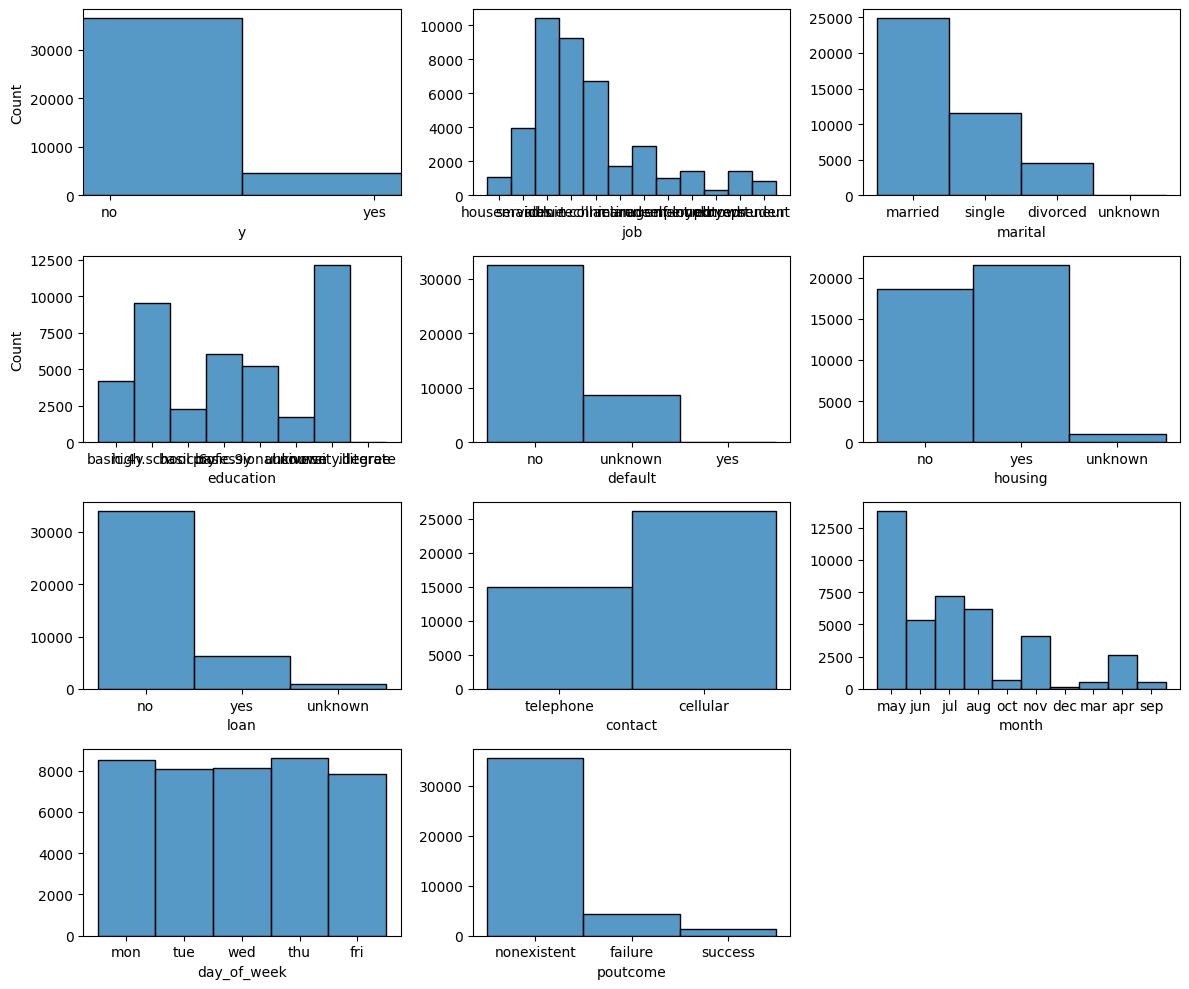

In [6]:
fig, axis = plt.subplots(4, 3, figsize=(12, 10))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df, x="y").set_xlim(-0.1, 1.1)
sns.histplot(ax=axis[0, 1], data=df, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="marital").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="education")
sns.histplot(ax=axis[1, 1], data=df, x="default").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="housing").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df, x="loan").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="contact").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=df, x="month").set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=df, x="day_of_week").set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x="poutcome").set(ylabel=None)

# Eliminar el subplot vacío que sobra (axis[3, 2])
fig.delaxes(axis[3, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


El porcentanje de éxito (contratacion) es 4640/41188 = 11,26%. El que no lo ha contratado es 36.548

El atributo día de la semana tomas valores practicamente constantes con el tiempo, por lo que no debería indicir mucho en el éxito de la 
campaña. Si bien es cierto que lunes y jueves es un pelín mayor el exito de contactar y el viernes el peor día para contactar.

El resto de atributos tienes histogramas de frecuencia con distribución variable pero no constante.

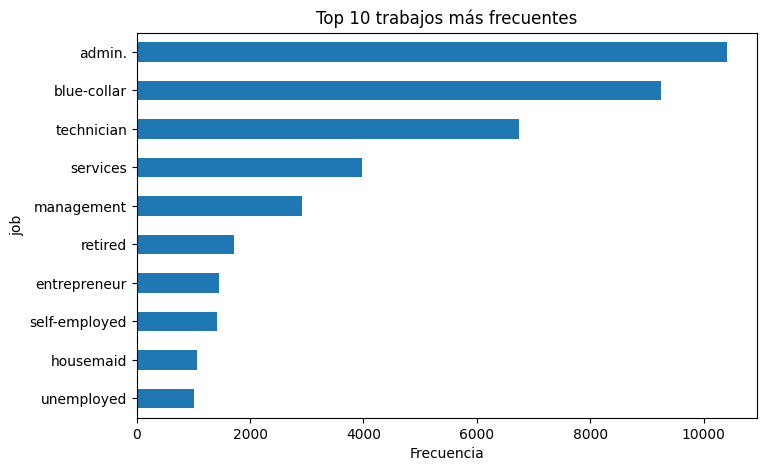

In [7]:
df['job'].value_counts().head(10)
df['job'].value_counts().head(10).plot(kind='barh', figsize=(8, 5))
plt.xlabel('Frecuencia')
plt.title('Top 10 trabajos más frecuentes')
plt.gca().invert_yaxis()  #  para que el más frecuente quede arriba
plt.show()

Análisis sobre variables numéricas

'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

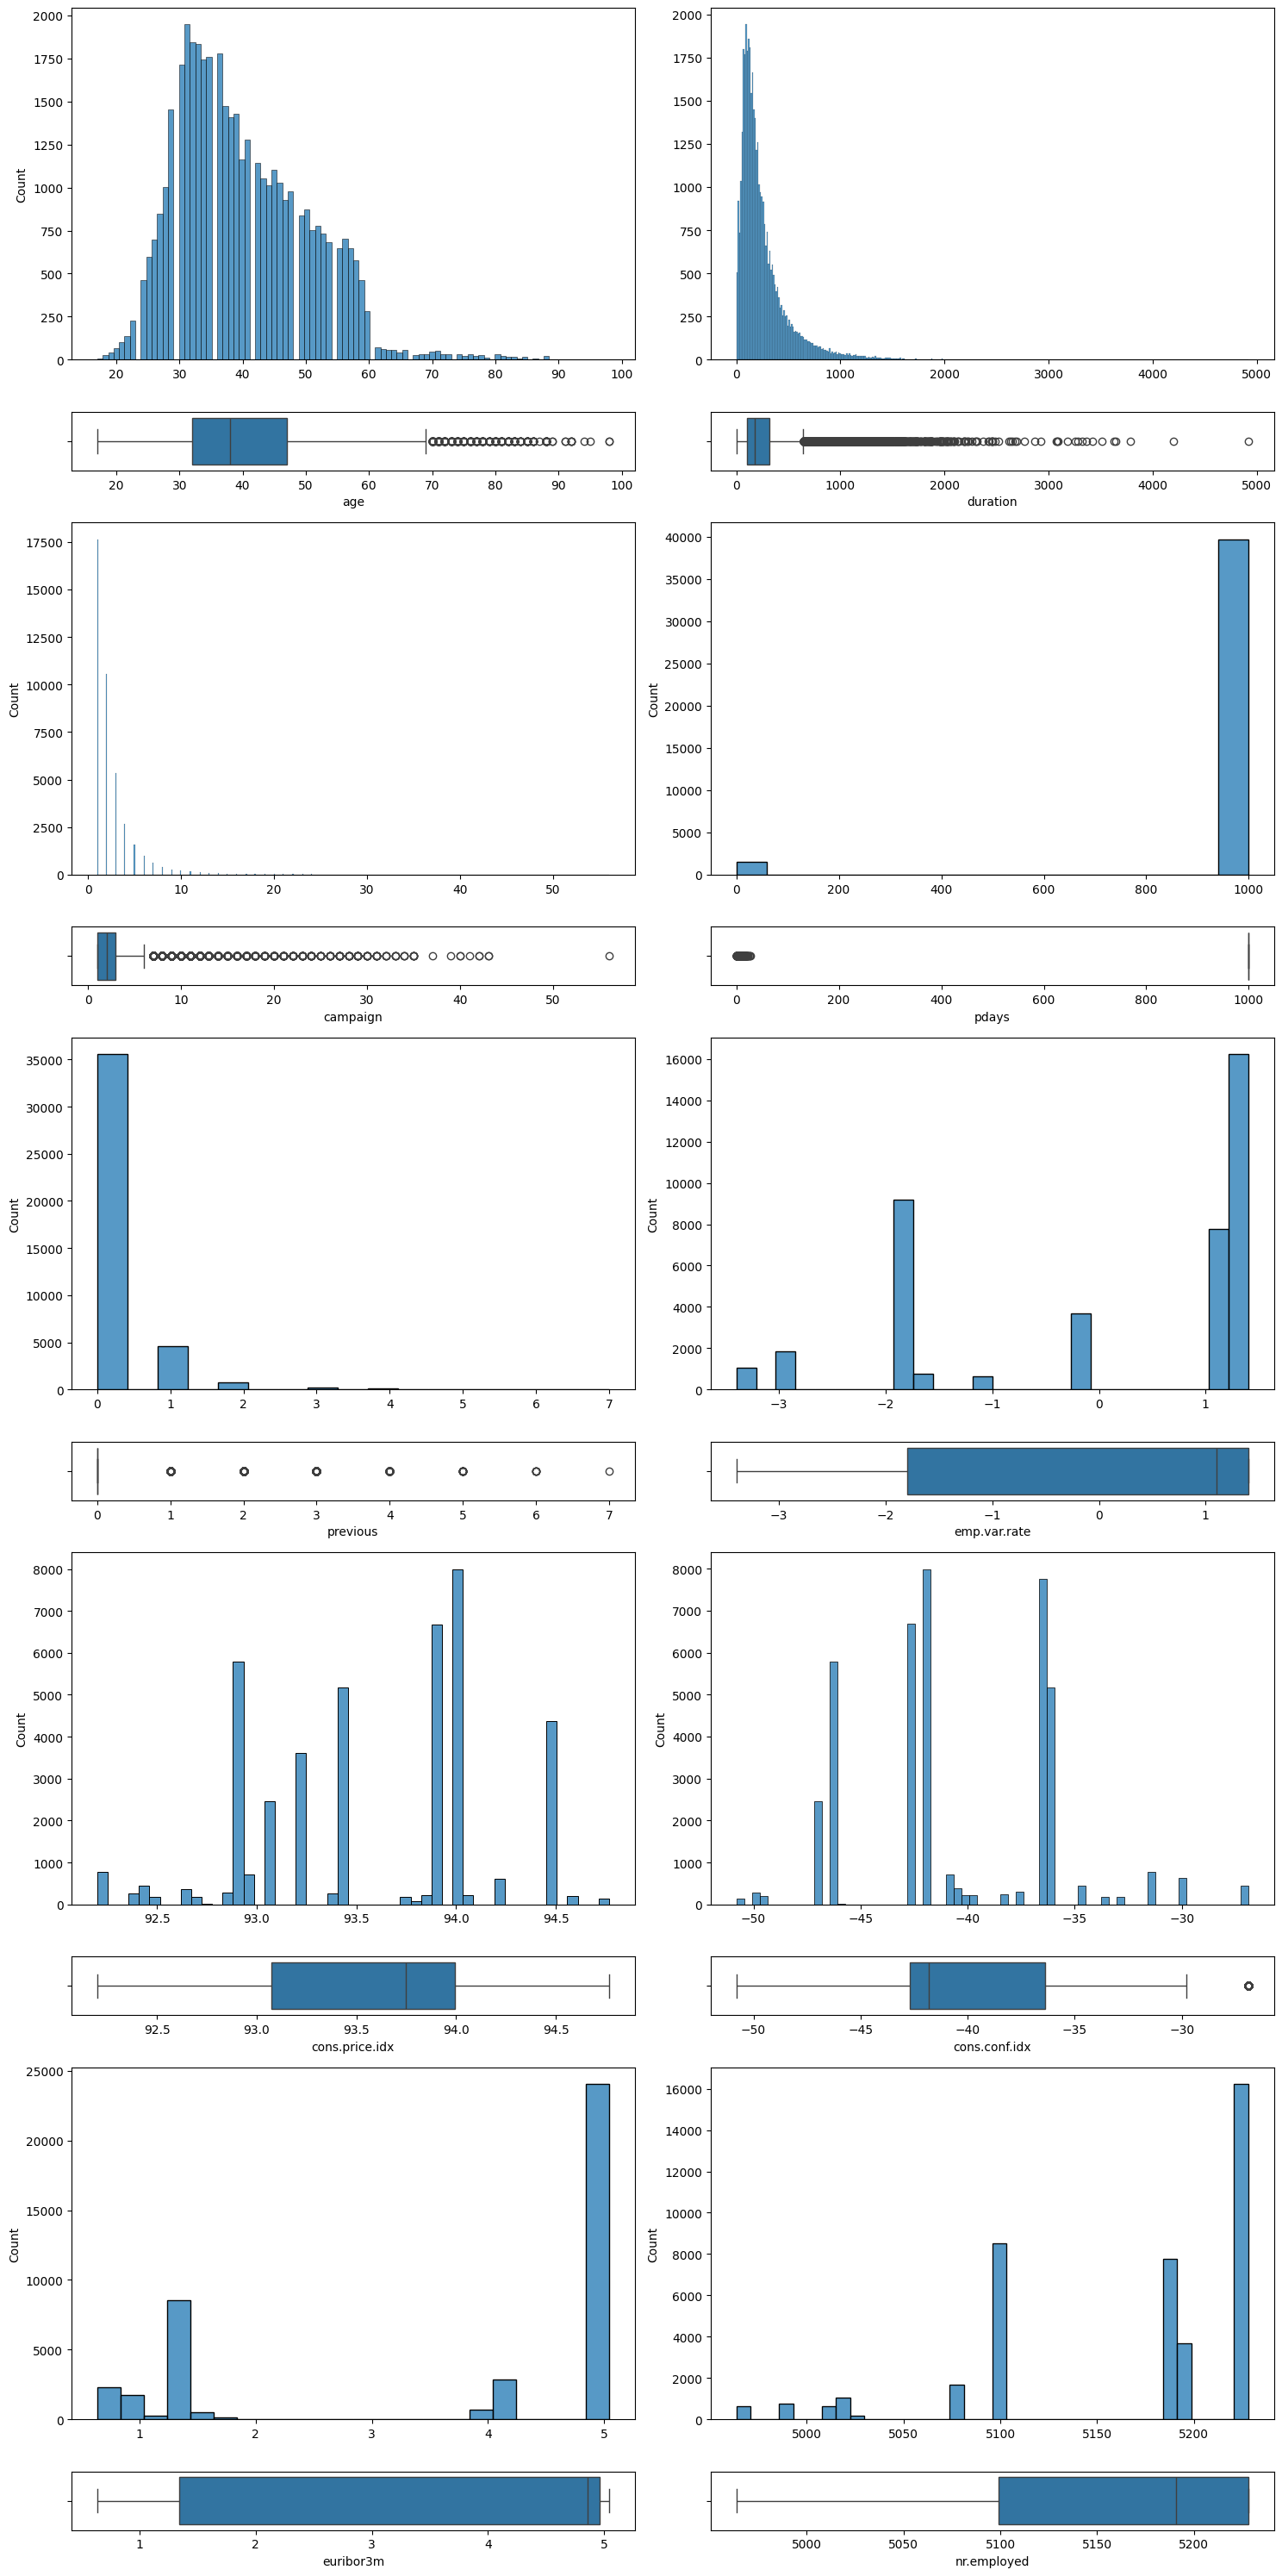

In [8]:
from matplotlib.gridspec import GridSpec

# Crear la figura y el GridSpec
fig = plt.figure(figsize=(15, 30))

# Usar GridSpec para dividir el espacio (10 filas, 2 columnas)
gs = GridSpec(10, 2, figure=fig, height_ratios=[6, 1] * 5)  # 5 pares de histograma y boxplot (10 filas en total)

# Crear los gráficos de histograma y boxplot
sns.histplot(ax=fig.add_subplot(gs[0, 0]), data=df, x="age").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[1, 0]), data=df, x="age")

sns.histplot(ax=fig.add_subplot(gs[0, 1]), data=df, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=fig.add_subplot(gs[1, 1]), data=df, x="duration")

sns.histplot(ax=fig.add_subplot(gs[2, 0]), data=df, x="campaign").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[3, 0]), data=df, x="campaign")

sns.histplot(ax=fig.add_subplot(gs[2, 1]), data=df, x="pdays").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[3, 1]), data=df, x="pdays")

sns.histplot(ax=fig.add_subplot(gs[4, 0]), data=df, x="previous").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[5, 0]), data=df, x="previous")

sns.histplot(ax=fig.add_subplot(gs[4, 1]), data=df, x="emp.var.rate").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[5, 1]), data=df, x="emp.var.rate")

sns.histplot(ax=fig.add_subplot(gs[6, 0]), data=df, x="cons.price.idx").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[7, 0]), data=df, x="cons.price.idx")

sns.histplot(ax=fig.add_subplot(gs[6, 1]), data=df, x="cons.conf.idx").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[7, 1]), data=df, x="cons.conf.idx")

sns.histplot(ax=fig.add_subplot(gs[8, 0]), data=df, x="euribor3m").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[9, 0]), data=df, x="euribor3m")

sns.histplot(ax=fig.add_subplot(gs[8, 1]), data=df, x="nr.employed").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[9, 1]), data=df, x="nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



OUTLIERS:

age: valor medio, y rango del 25-75% consistente con std razonable, practicamente entre 25-60 años caen la mayor parte de los valores, por lo que se podrían eliminar segurametne por encima y por debajo de ellos. Veremos los graficos cruzando por varyable "y". Sorprende una edad de 17 años, debería revisarse si es legal, o quizás luego se haya hablado con los padres y no se haya adecuado el contacto.

duration: se aprecian mucho más outliers, ver si son demasiados para eliminar.

campaign: hay valores atipicos que debería revisarse si se trata de un error, o si alguien  porque no tiene logica contactar 56 veces con la misma persona, cuando el 75% y la media están entre 2 y 3. Y lo peor es que no contrató.

pdays: revisar, clientes que han pasado 0 días o similar desde la ultima campaña,y se ha vuelto a contactar, pero de esta gente si se han hecho contratos. Se aprecian claros outliers, dado que la mayoría de los valores estan próxiomos a 1000.

previous: se pueden eliminar, apenas hay.

In [ ]:
df[df['pdays']<100].value_counts()  # 1515

age  job      marital  education  default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y
98   retired  married  basic.4y   unknown  yes      no    cellular   oct    fri          476       1         2      2         success   -3.4          92.431          -26.9          0.730      5017.5       1    1
17   student  single   basic.9y   no       yes      no    cellular   aug    fri          92        3         4      2         success   -2.9          92.201          -31.4          0.869      5076.2       0    1
                       unknown    no       no       yes   cellular   oct    tue          896       1         2      2         success   -3.4          92.431          -26.9          0.742      5017.5       1    1
                                           yes      no    cellular   aug    wed          432       3         4      2         success   -2.9          92.201 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


age. Edad del cliente (numérico)
job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
** default. ¿Tiene crédito actualmente? (categórico) **
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome. Resultado de la campaña de marketing anterior (categórico)

emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)

y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

Análisis de variables multivariante

Numérico-Numérico

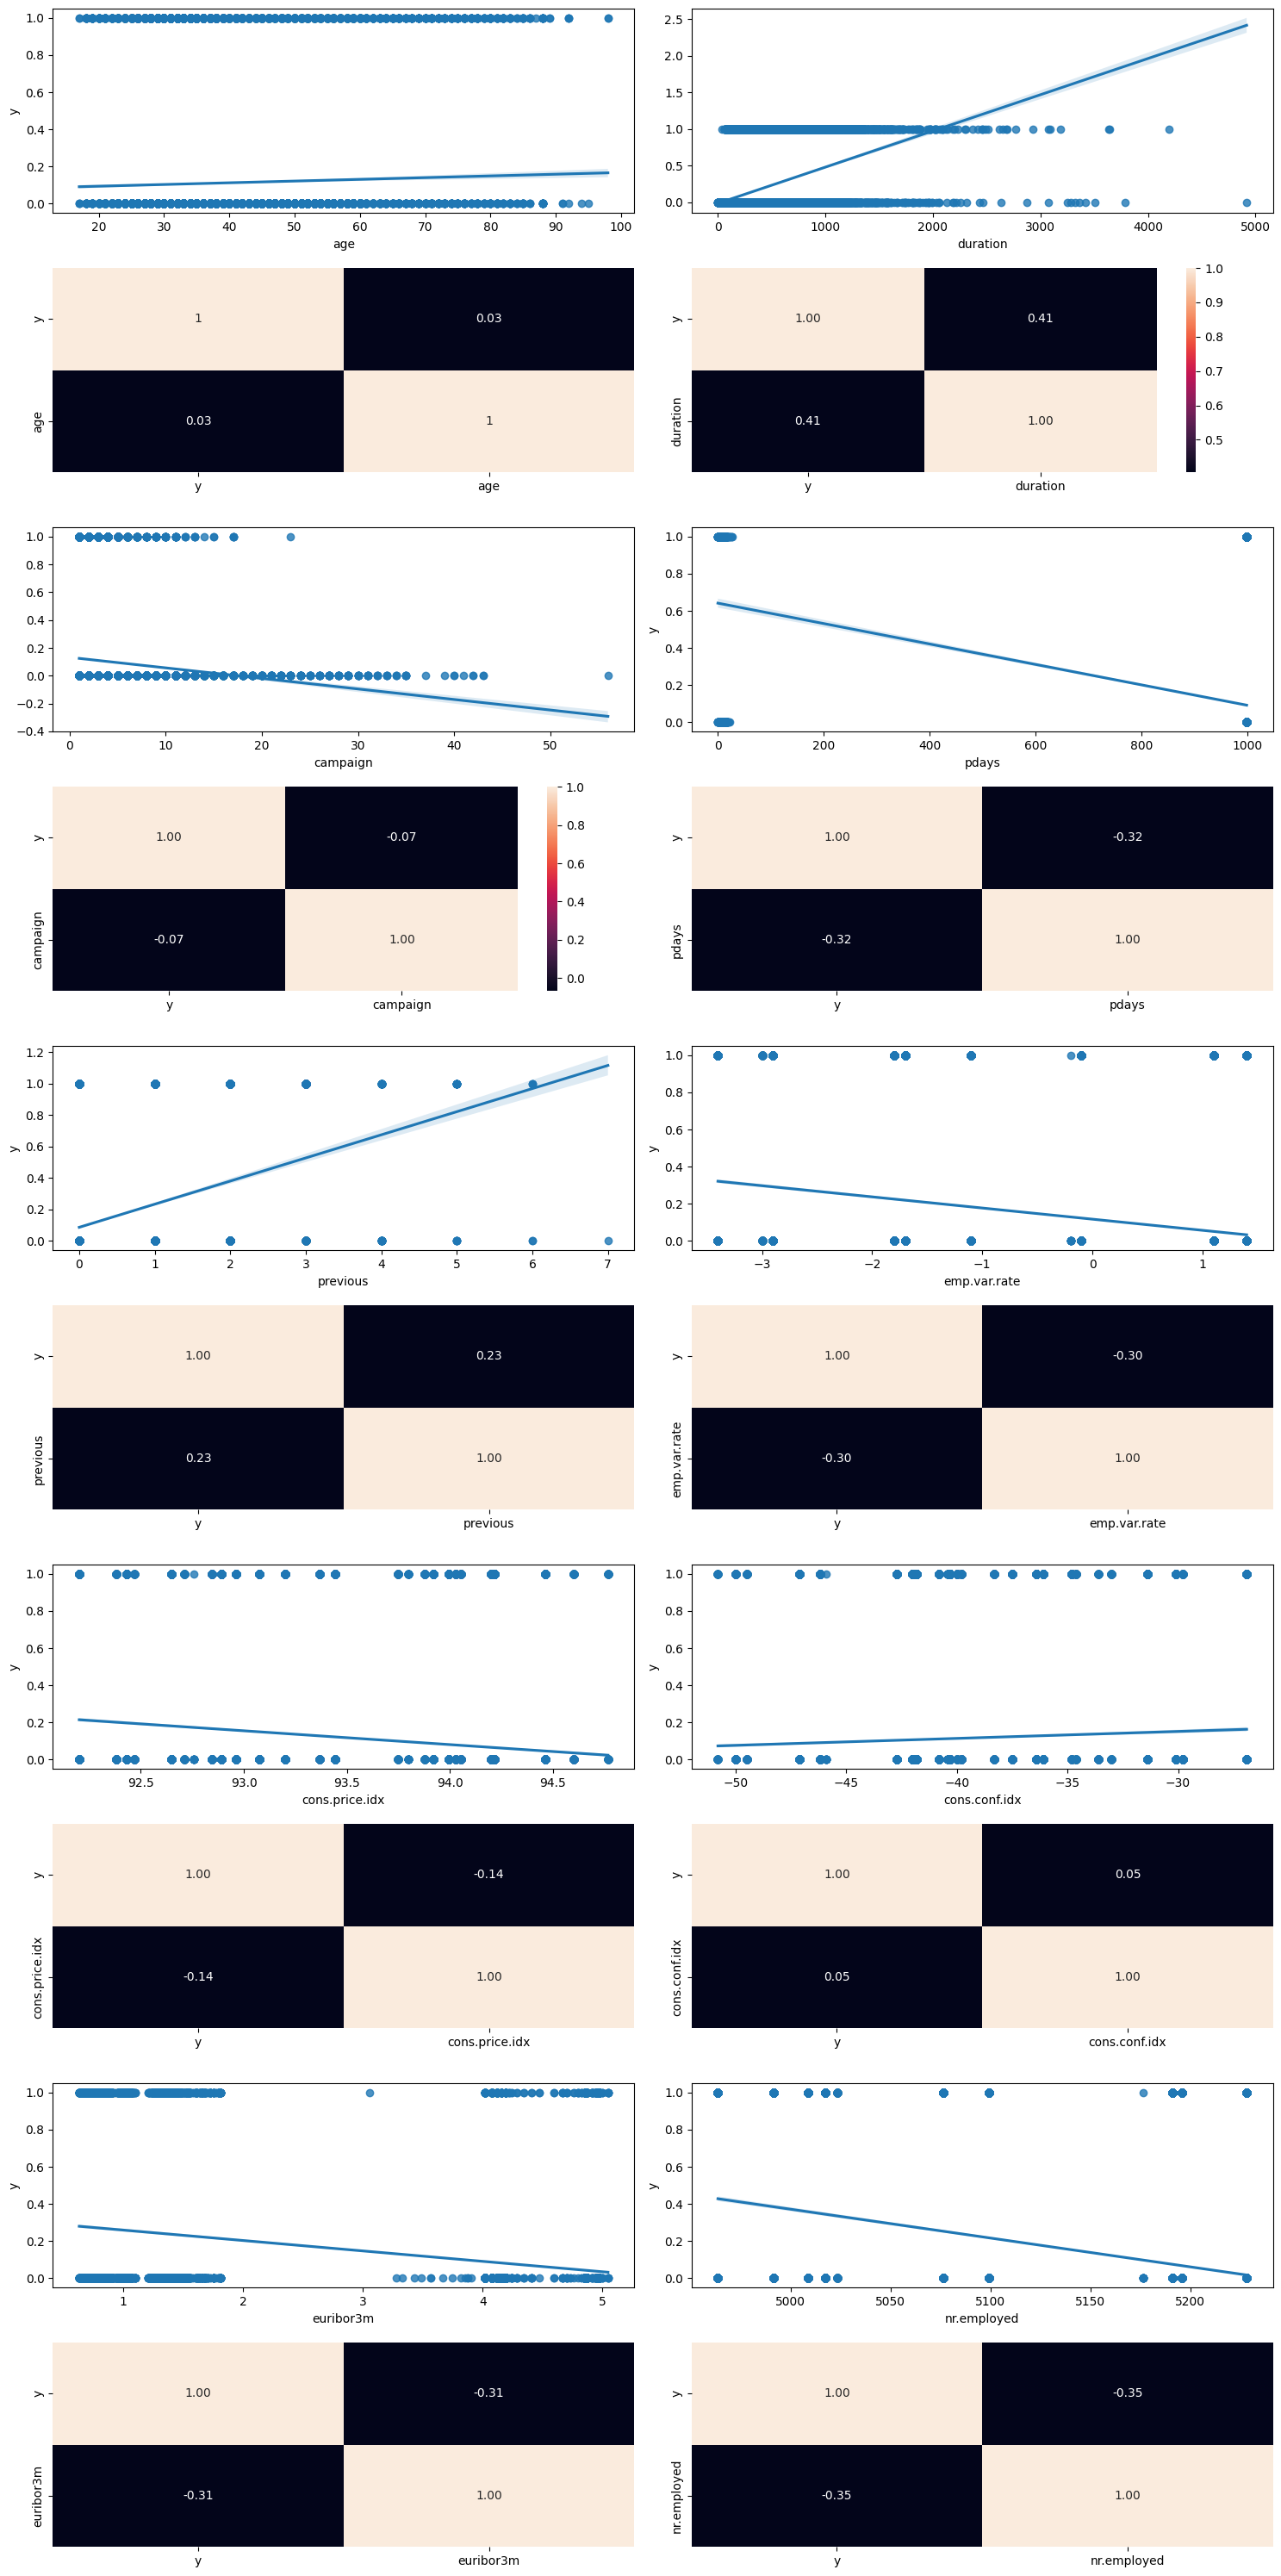

In [10]:
df["y"] = df["y"].map({"yes": 1, "no": 0})

fig, axis = plt.subplots(10, 2, figsize = (15, 30))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "y")
sns.heatmap(df[["y", "age"]].corr(), annot = True, ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "duration", y = "y").set(ylabel=None)
sns.heatmap(df[["y", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "campaign", y = "y").set(ylabel=None)
sns.heatmap(df[["y", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df, x = "pdays", y = "y")
sns.heatmap(df[["y", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[4, 0], data = df, x = "previous", y = "y")
sns.heatmap(df[["y", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[5,0], cbar = False)

sns.regplot(ax = axis[4, 1], data = df, x = "emp.var.rate", y = "y")
sns.heatmap(df[["y", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[6, 0], data = df, x = "cons.price.idx", y = "y")
sns.heatmap(df[["y", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

sns.regplot(ax = axis[6, 1], data = df, x = "cons.conf.idx", y = "y")
sns.heatmap(df[["y", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1], cbar = False)

sns.regplot(ax = axis[8, 0], data = df, x = "euribor3m", y = "y")
sns.heatmap(df[["y", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[9, 0], cbar = False)

sns.regplot(ax = axis[8, 1], data = df, x = "nr.employed", y = "y")
sns.heatmap(df[["y", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[9, 1], cbar = False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Age: apenas existe relación entre la edad y la contratación 
- Duration: existe una correlación positiva importante entre el valor target y duration (duracion del ultimmo contacto)
- Campaign: apenas se aprecia coorelación negativa 
